In [34]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [35]:
bag = rosbag.Bag('/home/uware/rosbags/static/rotation/16h5/s_yaw_16h5_5m_720_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [0,30,45,60]

In [36]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [37]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,2.455831
1,0.367851,2.981089
2,0.887701,3.674094
3,1.287751,4.095573
4,1.691795,3.831637
...,...,...
563,79.675301,20.065372
564,80.557743,-77.019543
565,81.238068,4.140191
566,82.755111,-14.284927


<AxesSubplot:xlabel='relative_time'>

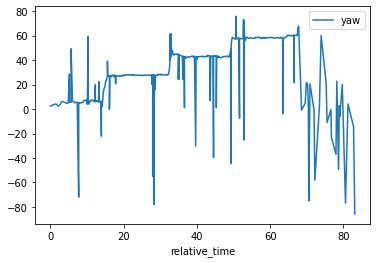

In [38]:
# initial graph
df.plot(x='relative_time', y=target)

In [39]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [40]:
# the amount of data points we are left with
len(x[peaks])

104

In [41]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

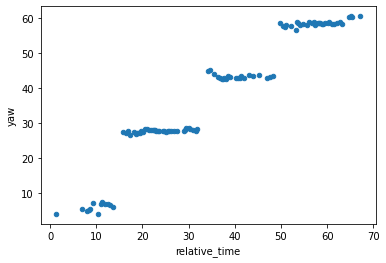

In [42]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [43]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.cut(df_filtered_by_targets[target], bins=len(input_vals), labels=input_vals)

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,relative_time,yaw,true_yaw
3,1.287751,4.095573,0
18,7.008039,5.587820,0
23,8.092788,4.993200,0
26,8.428161,5.300128,0
29,8.728294,5.434860,0
34,9.300487,7.163673,0
43,10.425586,4.154780,0
48,10.976949,6.963642,0
50,11.321784,7.480068,0
54,11.797335,7.011379,0


In [45]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [46]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [47]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.tail(2)

,relative_time,yaw,true_yaw,error
67,13.021756,6.643527,0,-6.643527
73,13.586228,6.102796,0,-6.102796
236,31.710770,27.881176,30,2.118824
238,31.927312,28.267544,30,1.732456
370,47.632507,43.087767,45,1.912233
376,48.279727,43.351591,45,1.648409
520,65.491793,60.212778,60,-0.212778
535,67.221522,60.464457,60,-0.464457


In [48]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
0,13.0,-5.984458,1.143570,-7.480068,-6.963642,-6.102796,-5.300128,-4.095573
30,37.0,2.209407,0.442472,1.356541,1.963869,2.160294,2.383216,3.483938
45,22.0,1.696089,0.668902,-0.094347,1.577832,1.925777,2.066743,2.513895
60,32.0,1.418888,0.837491,-0.489926,1.225317,1.505314,1.830940,3.442221


In [49]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

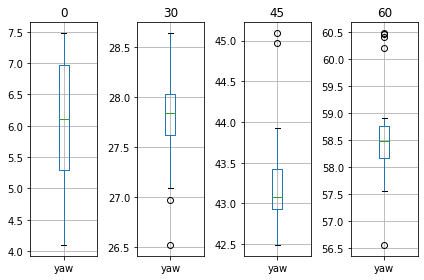

In [50]:
box_plotter(target)

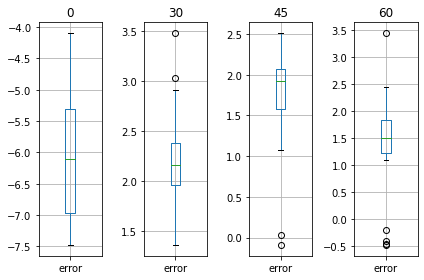

In [51]:
box_plotter('error')